In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# FUNCTION FOR FINDING THE BOUNDS BASED ON THE INTERQUARTILE RANGE.
# IMPORTANT FOR DETERMINING WHICH VALUES ARE OUTLIERS.
def find_bounds(data_array):
    q1, q3 = np.percentile(data_array,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    return lower_bound, upper_bound

In [3]:
# REMOVE STATISTICAL OUTLIERS FROM AN ARRAY OF NUMERIC VALUES.
def remove_outliers(data_array):
    data_array.sort()
    l_b, u_b = find_bounds(data_array)
    return [value for value in data_array if value >= l_b and value <= u_b]

In [4]:
def convert_to_minutes(time_seconds):
    time_minutes = time_seconds / 60
    return time_minutes

In [5]:
# LOAD IN THE RAW DATA AND MAKE A DISTINCTION BETWEEN NUMBER OF TURNS
# THAT ARE WAR VS. NON-WAR
df = pd.read_csv('../data/game_log.csv')
# I know... there is a chance that war turns are played multiple times at once
# This is a rough estimate.
df['Non_War_Turns'] = df['Total_Turns'] - df['Rounds_of_War']
df['id'] = [i for i in range(len(df['Total_Turns']))]
df

,Total_Turns,Rounds_of_War,Winner,Non_War_Turns,id
0,616,38,Player 1,578,0
1,282,16,Player 1,266,1
2,293,19,Player 1,274,2
3,383,22,Player 2,361,3
4,134,5,Player 2,129,4
...,...,...,...,...,...
59995,175,12,Player 2,163,59995
59996,1152,82,Player 1,1070,59996
59997,248,20,Player 2,228,59997
59998,188,14,Player 1,174,59998


In [6]:
# WE ARE GOING TO CREATE A TIME ESTIMATE BASED ON INFORMATION
# GATHERED DURING QUICK TIME TRIALS
AVERAGE_NON_WAR_TURN_TIME = 3.05
AVERAGE_WAR_TURN_TIME = 11.94

df['Estimated_Time_To_Completion'] = (df['Non_War_Turns'] * AVERAGE_NON_WAR_TURN_TIME)  + (df['Rounds_of_War'] * AVERAGE_WAR_TURN_TIME)
df

,Total_Turns,Rounds_of_War,Winner,Non_War_Turns,id,Estimated_Time_To_Completion
0,616,38,Player 1,578,0,2216.62
1,282,16,Player 1,266,1,1002.34
2,293,19,Player 1,274,2,1062.56
3,383,22,Player 2,361,3,1363.73
4,134,5,Player 2,129,4,453.15
...,...,...,...,...,...,...
59995,175,12,Player 2,163,59995,640.43
59996,1152,82,Player 1,1070,59996,4242.58
59997,248,20,Player 2,228,59997,934.20
59998,188,14,Player 1,174,59998,697.86


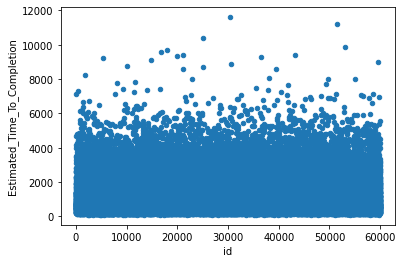

In [7]:
# QUICK LOOK AT THE DATA IN A SCATTER PLOT. BECOMES VERY CLEAR THERE ARE SOME OUTLIERS.
df.plot(x='id', y='Estimated_Time_To_Completion', kind='scatter')

In [10]:
# GOING TO REMOVE THE OUTLIERS TO FIND AN AVERAGE GAME TIME
estimated_game_times_seconds = list(df['Estimated_Time_To_Completion'])
estimated_game_times_seconds = remove_outliers(estimated_game_times_seconds)
average_game_time_seconds = np.average(estimated_game_times_seconds)
average_game_time_minutes = convert_to_minutes(average_game_time_seconds)
print('AVERAGE GAME TIME FOR WAR BETWEEN TWO PLAYERS: {}'.format(average_game_time_minutes))

AVERAGE GAME TIME FOR WAR BETWEEN TWO PLAYERS: 17.172258489805223


In [11]:
# GOING TO ALSO CHECK THE AVERAGE NUMBER OF TURNS, JUST CAUSE
number_of_turns = list(df['Total_Turns'])
number_of_turns = remove_outliers(number_of_turns)
average_number_of_turns = np.average(number_of_turns)
print('AVERAGE NUMBER OF TURNS FOR WAR BETWEEN TWO PLAYERS: {}'.format(average_number_of_turns))

AVERAGE NUMBER OF TURNS FOR WAR BETWEEN TWO PLAYERS: 286.72246557101306
